In [81]:
import cv2
import cv2 as cv
import urllib
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
from numpy import asarray
import matplotlib.image as mpimg
from scipy import ndimage
from skimage import filters, feature, measure, color
from skimage.segmentation import watershed


In [82]:
def show(image,x=30,y=7):
  plt.figure(figsize=(x,y))
  plt.imshow(image,cmap="gray")


In [83]:
img = cv2.imread(r"/image_1.jpg")



[[[ 78  21  20]
  [ 77  20  19]
  [ 75  19  18]
  ...
  [130  43  39]
  [134  44  43]
  [136  44  43]]

 [[ 78  21  20]
  [ 77  20  19]
  [ 75  19  18]
  ...
  [130  43  39]
  [133  43  42]
  [135  43  42]]

 [[ 80  20  20]
  [ 79  22  21]
  [ 78  22  21]
  ...
  [130  43  39]
  [130  43  39]
  [133  44  40]]

 ...

 [[ 17  22  25]
  [ 17  22  25]
  [ 16  20  21]
  ...
  [145  50  41]
  [144  49  40]
  [144  49  40]]

 [[ 17  22  25]
  [ 17  22  25]
  [ 17  21  22]
  ...
  [142  47  38]
  [141  46  37]
  [142  47  38]]

 [[ 17  22  25]
  [ 18  23  26]
  [ 18  22  23]
  ...
  [140  45  36]
  [141  46  37]
  [140  45  36]]]


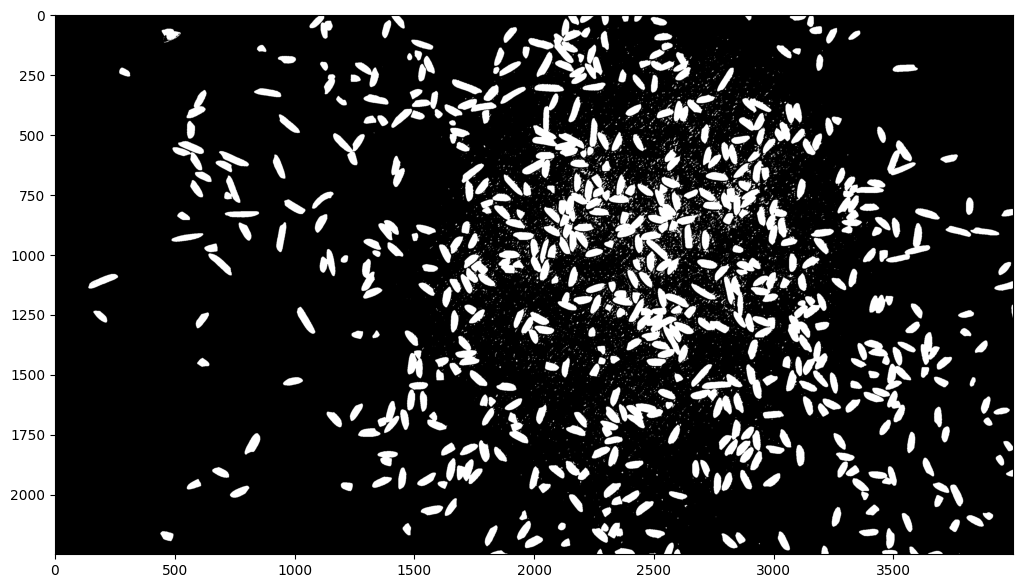

In [84]:
print(img)
grayscale_Image = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
m,brok_img = cv.threshold(grayscale_Image, 120, 255, cv.THRESH_BINARY)

show(brok_img)


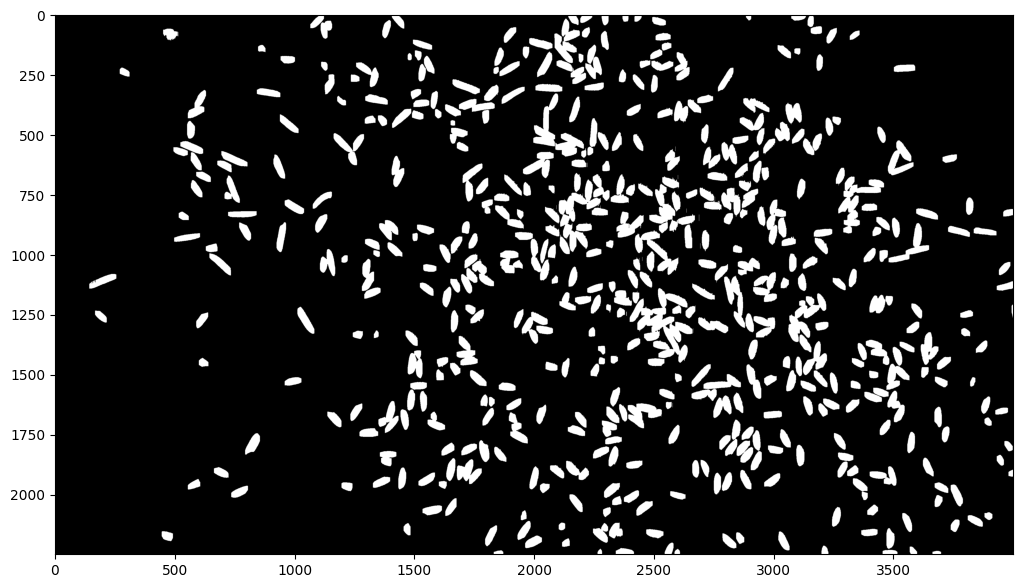

In [85]:
kernel = np.ones((3),np.uint8)
clr_img = cv.morphologyEx(brok_img,cv.MORPH_OPEN, kernel, iterations=8)
show(clr_img)

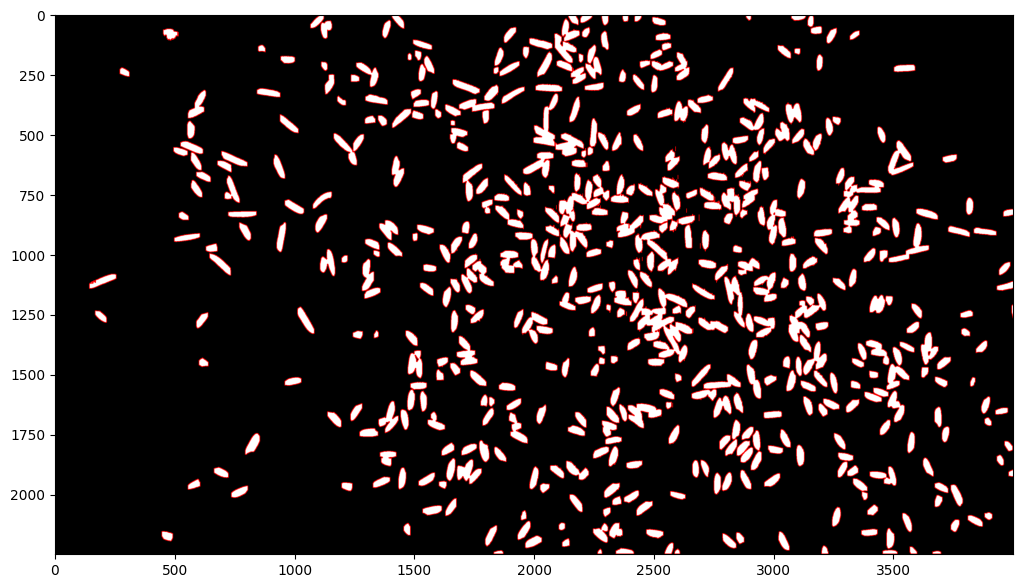

In [86]:
contours, hierarchy = cv.findContours(clr_img,
                                          cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

opt_contour = cv.cvtColor(clr_img, cv.COLOR_GRAY2BGR)
cv.drawContours(opt_contour, contours, -1, (255, 0, 0), 2)
show(opt_contour)

In [87]:
contours, hierarchy = cv.findContours(clr_img,
                                      cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
opt_contour = cv.cvtColor(clr_img, cv.COLOR_GRAY2BGR)
cv.drawContours(opt_contour, contours, -1, (0, 0, 255), 2)
print("Number of detected contours", len(contours))

Number of detected contours 513


In [88]:
dist_trans = ndimage.distance_transform_edt(clr_img)
local_max = feature.peak_local_max(dist_trans, min_distance=23)
local_max_mask = np.zeros(dist_trans.shape, dtype=bool)
local_max_mask[tuple(local_max.T)] = True
labels = watershed(-dist_trans, measure.label(local_max_mask), mask=clr_img)
Rice_area = []
unique_labels = np.unique(labels)
for label in unique_labels:
    if label == 0:
        continue
    object_mask = labels == label
    area = np.sum(object_mask)
    if area < 50:
        continue
    eq_diameter = np.sqrt(4 * area / np.pi)
    eq_diameter_mm = eq_diameter * 0.09
    Rice_area.append(round(eq_diameter_mm,3))

Number of Rice grains are : 586


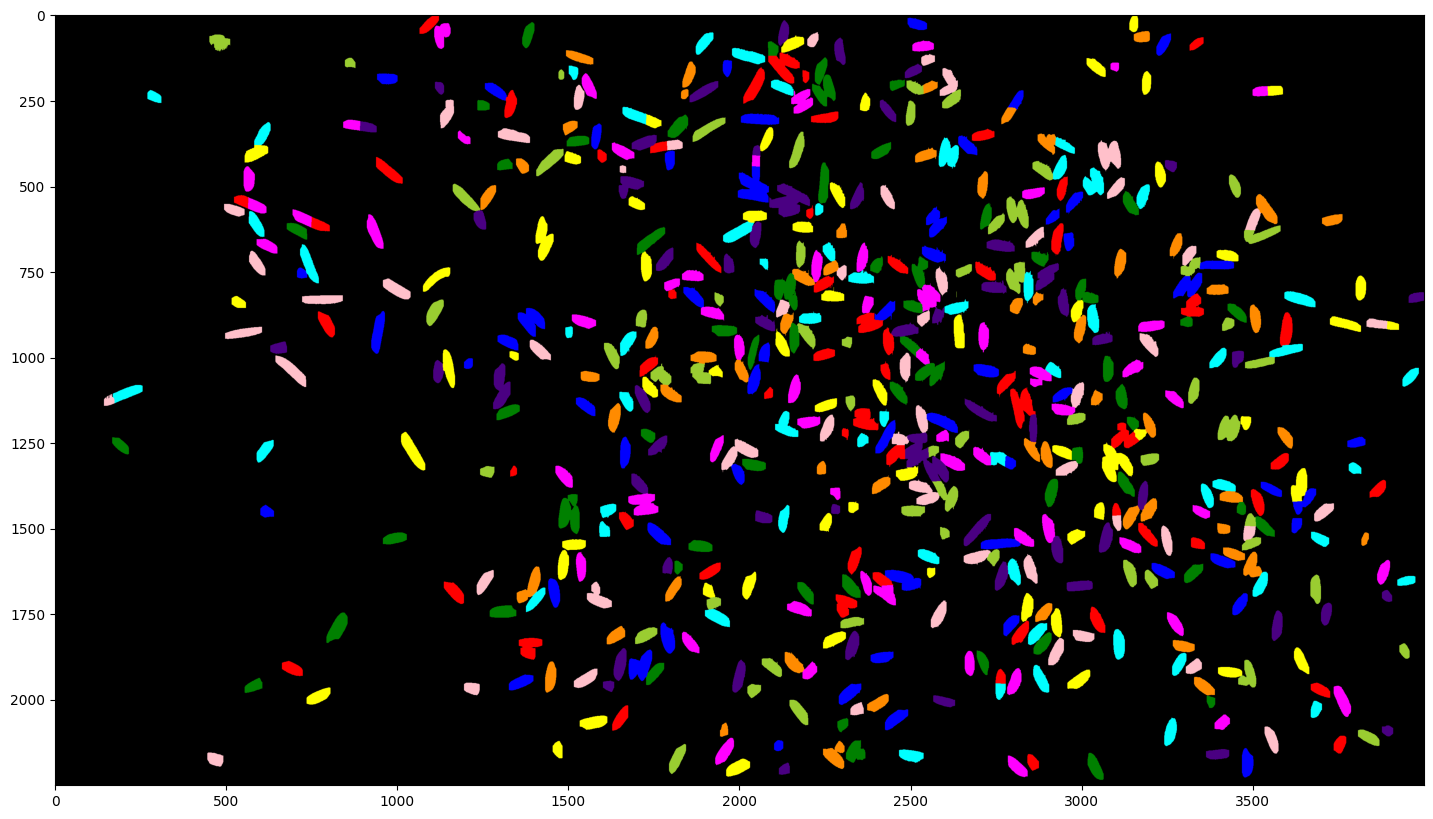

In [89]:
plt.figure(figsize=(30,10))
plt.imshow(color.label2rgb(labels, bg_label=0))
print("Number of Rice grains are : %d" % labels.max())

In [90]:
print("\n\nTotal rice grain count as per contour is: ",len(Rice_area))
print("\n")
TotalRiceAreaSum=0
for count in range(0,len(Rice_area)):
    print("Area of the rice grain",count+1, "is:",Rice_area[count],"mm")



Total rice grain count as per contour is:  585


Area of the rice grain 1 is: 4.197 mm
Area of the rice grain 2 is: 4.002 mm
Area of the rice grain 3 is: 3.344 mm
Area of the rice grain 4 is: 5.048 mm
Area of the rice grain 5 is: 4.332 mm
Area of the rice grain 6 is: 4.138 mm
Area of the rice grain 7 is: 3.713 mm
Area of the rice grain 8 is: 4.437 mm
Area of the rice grain 9 is: 3.284 mm
Area of the rice grain 10 is: 4.645 mm
Area of the rice grain 11 is: 3.208 mm
Area of the rice grain 12 is: 4.187 mm
Area of the rice grain 13 is: 4.601 mm
Area of the rice grain 14 is: 4.125 mm
Area of the rice grain 15 is: 3.367 mm
Area of the rice grain 16 is: 4.402 mm
Area of the rice grain 17 is: 4.521 mm
Area of the rice grain 18 is: 5.455 mm
Area of the rice grain 19 is: 3.272 mm
Area of the rice grain 20 is: 2.77 mm
Area of the rice grain 21 is: 6.836 mm
Area of the rice grain 22 is: 3.364 mm
Area of the rice grain 23 is: 4.309 mm
Area of the rice grain 24 is: 2.431 mm
Area of the rice grain 

In [91]:
BrokenRiceCount=0;
brokenRiceArea=0;
TotalRiceAreaSum=0
for rice in Rice_area:
    TotalRiceAreaSum+=rice
    if rice <3.0:
        brokenRiceArea+=rice
        BrokenRiceCount+=1

print("\nRice Analysis :")

print("Total rice count is",len(Rice_area))
    #Average area of rice
print("Average area of rice is: ", round(TotalRiceAreaSum/len(Rice_area),3)," mm")

print("Broken Rice count is: ",BrokenRiceCount)

#Percentage of rice grain Broken
print("Percentage of rice grain broken is :",round((brokenRiceArea/len(Rice_area)+brokenRiceArea),3),"% percent")


Rice Analysis :
Total rice count is 585
Average area of rice is:  4.313  mm
Broken Rice count is:  45
Percentage of rice grain broken is : 121.3 % percent


In [92]:
import cv2
import cv2 as cv
import urllib
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
from numpy import asarray
import matplotlib.image as mpimg
from scipy import ndimage
from skimage import filters, feature, measure, color
from skimage.segmentation import watershed

In [93]:
def show(image,x=30,y=7):
  plt.figure(figsize=(x,y))
  plt.imshow(image,cmap="gray")
img = cv2.imread(r"/image_2.jpg")

[[[107  28  25]
  [106  27  24]
  [106  27  24]
  ...
  [138  47  43]
  [138  47  43]
  [137  46  42]]

 [[107  28  25]
  [107  28  25]
  [107  28  25]
  ...
  [139  48  44]
  [139  48  44]
  [138  47  43]]

 [[107  28  25]
  [107  28  25]
  [107  28  25]
  ...
  [141  48  45]
  [141  48  45]
  [140  47  44]]

 ...

 [[ 22  15  22]
  [ 22  15  22]
  [ 23  15  22]
  ...
  [150  54  48]
  [150  54  48]
  [150  54  48]]

 [[ 27  20  27]
  [ 24  17  24]
  [ 24  16  23]
  ...
  [153  57  51]
  [149  53  47]
  [150  54  48]]

 [[ 27  20  27]
  [ 24  17  24]
  [ 24  16  23]
  ...
  [153  57  51]
  [149  53  47]
  [150  54  48]]]


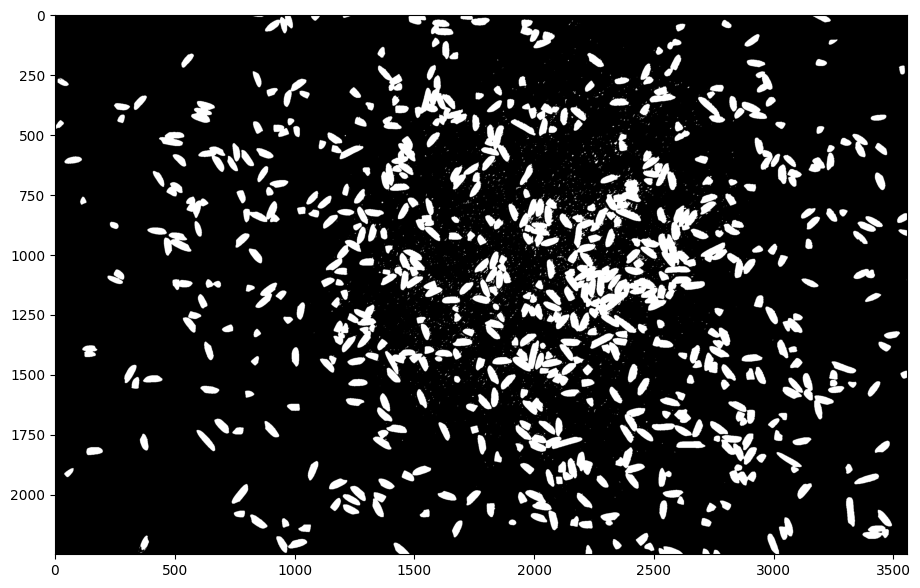

In [94]:
print(img)
grayscale_Image = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
m,brok_img = cv.threshold(grayscale_Image, 120, 255, cv.THRESH_BINARY)

show(brok_img)


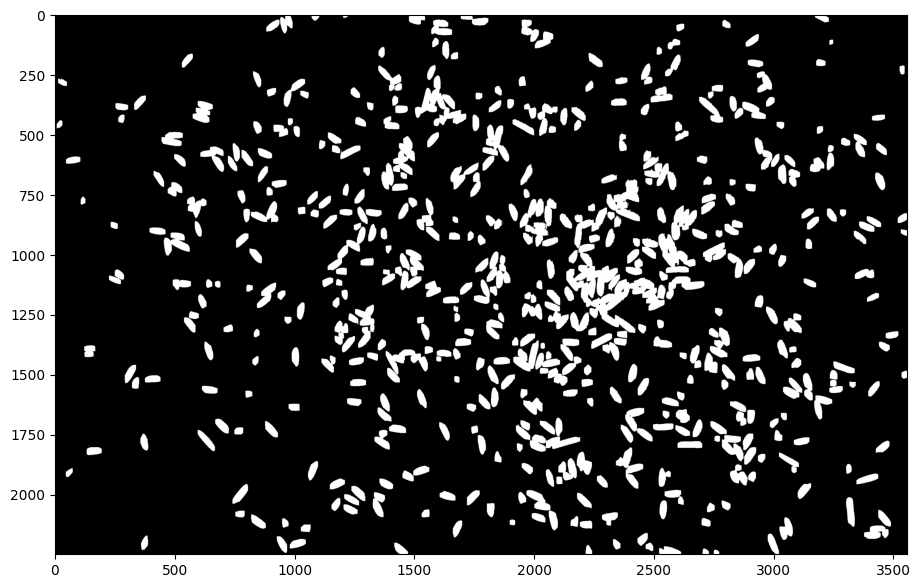

In [95]:
kernel = np.ones((3),np.uint8)
clr_img = cv.morphologyEx(brok_img,cv.MORPH_OPEN, kernel, iterations=8)
show(clr_img)

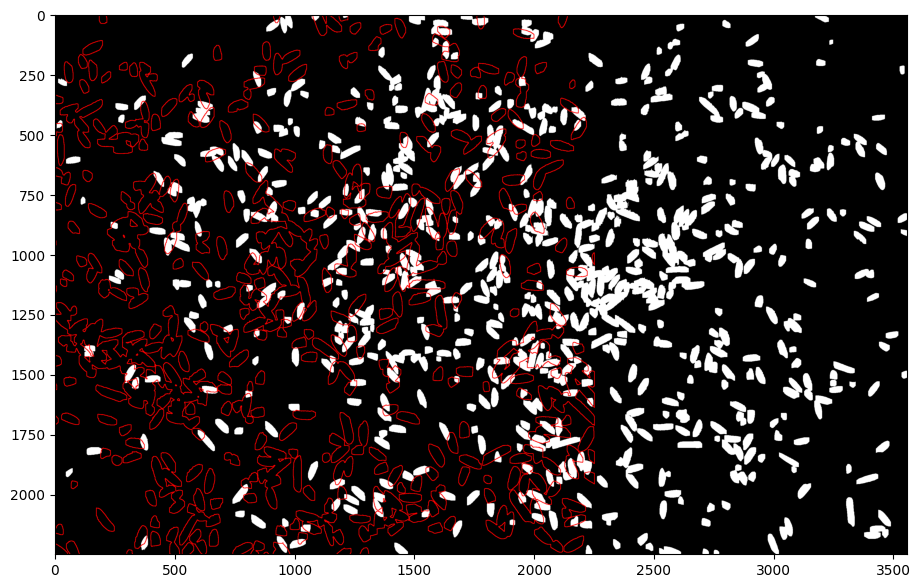

In [96]:
contours, hierarchy = cv.findContours(clear_image,
                                          cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
opt_contour = cv.cvtColor(clr_img, cv.COLOR_GRAY2BGR)
cv.drawContours(opt_contour, contours, -1, (255, 0, 0), 2)
show(opt_contour)

In [97]:
contours, hierarchy = cv.findContours(clr_img,
                                      cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
opt_contour = cv.cvtColor(clr_img, cv.COLOR_GRAY2BGR)
cv.drawContours(opt_contour, contours, -1, (0, 0, 255), 2)
print("Number of detected contours", len(contours))

Number of detected contours 517


In [98]:
dist_trans = ndimage.distance_transform_edt(clr_img)
local_max = feature.peak_local_max(dist_trans, min_distance=23)
local_max_mask = np.zeros(dist_trans.shape, dtype=bool)
local_max_mask[tuple(local_max.T)] = True
labels = watershed(-dist_trans, measure.label(local_max_mask), mask=clr_img)
Rice_area = []
unique_labels = np.unique(labels)
for label in unique_labels:
    if label == 0:
        continue
    object_mask = labels == label
    area = np.sum(object_mask)
    if area < 50:
        continue
    eq_diameter = np.sqrt(4 * area / np.pi)
    eq_diameter_mm = eq_diameter * 0.09
    Rice_area.append(round(eq_diameter_mm,3))

Number of Rice grains are : 602


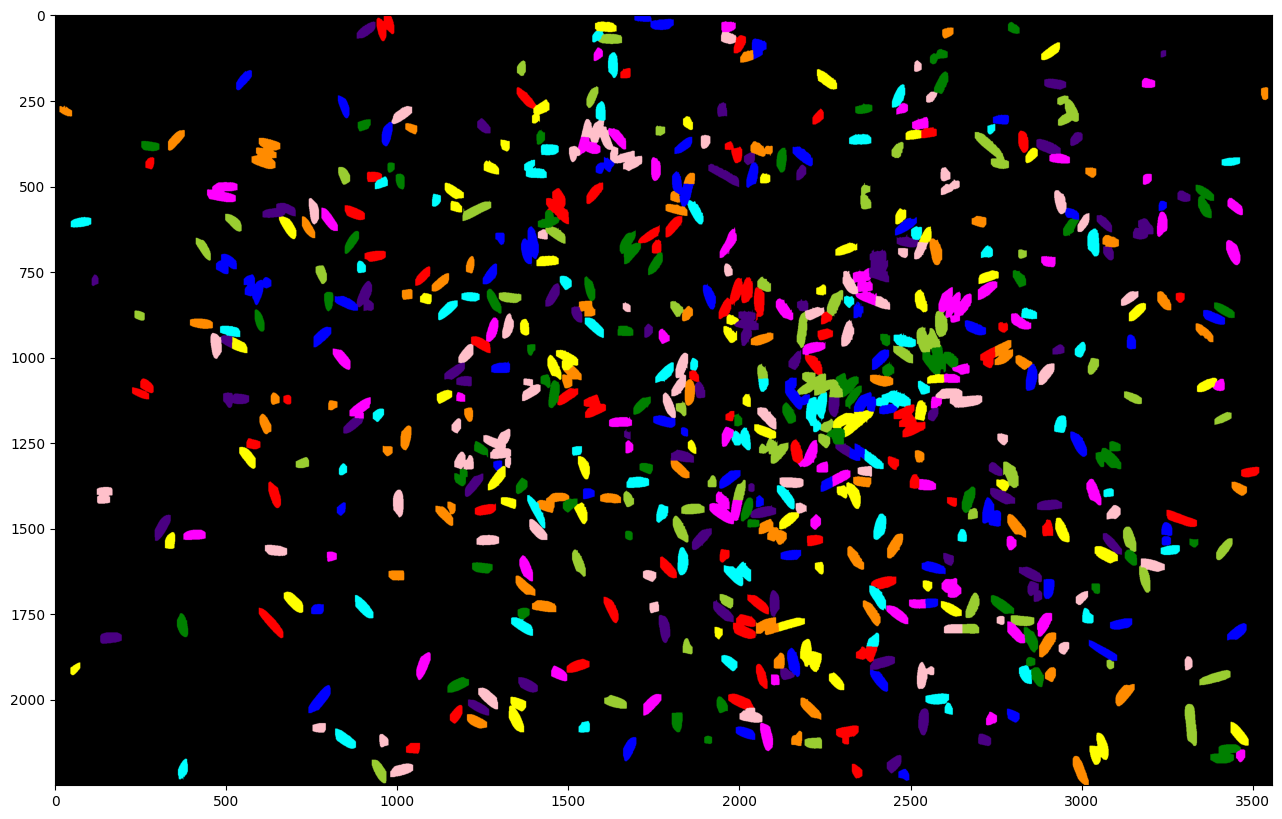

In [99]:
plt.figure(figsize=(30,10))
plt.imshow(color.label2rgb(labels, bg_label=0))
print("Number of Rice grains are : %d" % labels.max())

In [100]:
print("\n\nTotal rice grain count as per contour is: ",len(Rice_area))
print("\n")
TotalRiceAreaSum=0
for count in range(0,len(Rice_area)):
    print("Area of the rice grain",count+1, "is:",Rice_area[count],"mm")



Total rice grain count as per contour is:  602


Area of the rice grain 1 is: 5.255 mm
Area of the rice grain 2 is: 5.335 mm
Area of the rice grain 3 is: 4.14 mm
Area of the rice grain 4 is: 3.448 mm
Area of the rice grain 5 is: 3.021 mm
Area of the rice grain 6 is: 4.087 mm
Area of the rice grain 7 is: 2.959 mm
Area of the rice grain 8 is: 2.82 mm
Area of the rice grain 9 is: 3.63 mm
Area of the rice grain 10 is: 4.174 mm
Area of the rice grain 11 is: 3.755 mm
Area of the rice grain 12 is: 4.369 mm
Area of the rice grain 13 is: 4.055 mm
Area of the rice grain 14 is: 2.847 mm
Area of the rice grain 15 is: 3.737 mm
Area of the rice grain 16 is: 1.762 mm
Area of the rice grain 17 is: 3.365 mm
Area of the rice grain 18 is: 4.24 mm
Area of the rice grain 19 is: 2.5 mm
Area of the rice grain 20 is: 3.075 mm
Area of the rice grain 21 is: 2.844 mm
Area of the rice grain 22 is: 3.924 mm
Area of the rice grain 23 is: 4.553 mm
Area of the rice grain 24 is: 3.165 mm
Area of the rice grain 25 is

In [101]:
BrokenRiceCount=0;
brokenRiceArea=0;
TotalRiceAreaSum=0
for rice in Rice_area:
    TotalRiceAreaSum+=rice
    if rice <4.064:
        brokenRiceArea+=rice
        BrokenRiceCount+=1
print("\nRice Analysis :")
print("Total rice count is",len(Rice_area))
print("Average area of rice is: ", round(TotalRiceAreaSum/len(Rice_area),3)," mm")
print("Broken Rice count is: ",BrokenRiceCount)
print("Percentage of rice grain broken is :",round((brokenRiceArea/len(Rice_area)+brokenRiceArea),3),"% percent")


Rice Analysis :
Total rice count is 602
Average area of rice is:  3.973  mm
Broken Rice count is:  317
Percentage of rice grain broken is : 1046.234 % percent


In [102]:
import cv2
import cv2 as cv
import urllib
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
from numpy import asarray
import matplotlib.image as mpimg
from scipy import ndimage
from skimage import filters, feature, measure, color
from skimage.segmentation import watershed

In [103]:
def show(image,x=30,y=7):
  plt.figure(figsize=(x,y))
  plt.imshow(image,cmap="gray")
img = cv2.imread(r"/image_3.jpg")

[[[147  55  44]
  [147  55  44]
  [146  54  43]
  ...
  [150  58  47]
  [153  63  46]
  [151  62  42]]

 [[148  56  45]
  [148  56  45]
  [148  56  45]
  ...
  [150  58  47]
  [151  60  45]
  [150  60  43]]

 [[145  53  42]
  [146  54  43]
  [148  56  45]
  ...
  [153  58  49]
  [151  59  48]
  [151  59  48]]

 ...

 [[120  32  26]
  [123  32  27]
  [124  35  25]
  ...
  [ 22  27  18]
  [ 23  28  19]
  [ 23  28  19]]

 [[124  31  30]
  [124  32  27]
  [123  32  23]
  ...
  [ 24  29  20]
  [ 24  29  20]
  [ 23  28  19]]

 [[124  31  30]
  [125  32  29]
  [125  32  23]
  ...
  [ 23  28  19]
  [ 23  28  19]
  [ 23  28  19]]]


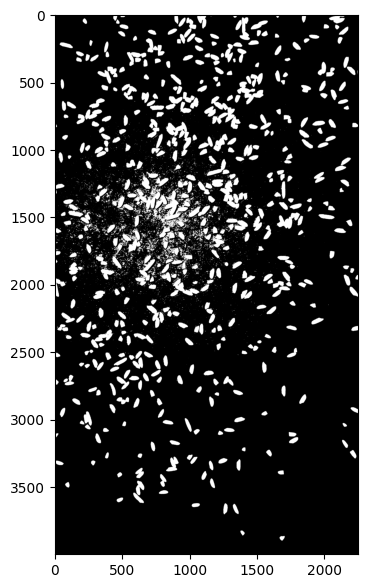

In [104]:
print(img)
grayscale_Image = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
m, brok_img = cv.threshold(grayscale_Image, 120, 255, cv.THRESH_BINARY)

show(brok_img)


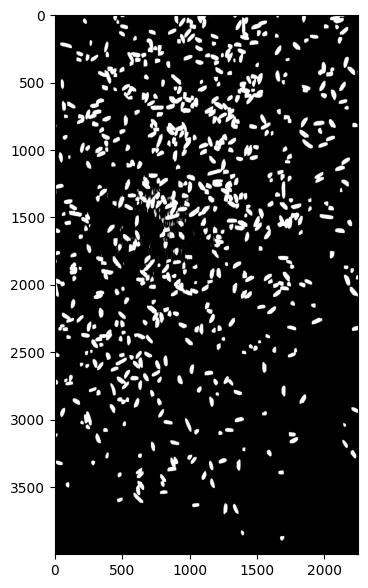

In [105]:
kernel = np.ones((3),np.uint8)
clr_img = cv.morphologyEx(brok_img,cv.MORPH_OPEN, kernel, iterations=8)
show(clr_img)

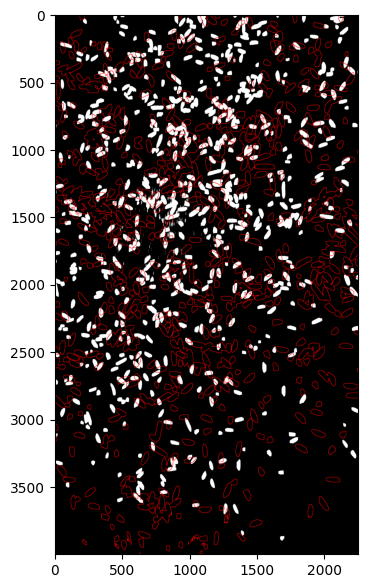

In [106]:
contours, hierarchy = cv.findContours(clear_image,
                                          cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
opt_contour = cv.cvtColor(clr_img, cv.COLOR_GRAY2BGR)
cv.drawContours(opt_contour, contours, -1, (255, 0, 0), 2)
show(opt_contour)

In [107]:
contours, hierarchy = cv.findContours(clr_img,
                                      cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
opt_contour = cv.cvtColor(clr_img, cv.COLOR_GRAY2BGR)
cv.drawContours(opt_contour, contours, -1, (0, 0, 255), 2)
print("Number of detected contours", len(contours))

Number of detected contours 661


In [108]:
dist_trans = ndimage.distance_transform_edt(clr_img)
local_max = feature.peak_local_max(dist_trans, min_distance=23)
local_max_mask = np.zeros(dist_trans.shape, dtype=bool)
local_max_mask[tuple(local_max.T)] = True
labels = watershed(-dist_trans, measure.label(local_max_mask), mask=clr_img)
Rice_area = []
unique_labels = np.unique(labels)
for label in unique_labels:
    if label == 0:
        continue
    object_mask = labels == label
    area = np.sum(object_mask)
    if area < 50:
        continue
    eq_diameter = np.sqrt(4 * area / np.pi)
    eq_diameter_mm = eq_diameter * 0.09
    Rice_area.append(round(eq_diameter_mm,3))

Number of Rice grains are : 618


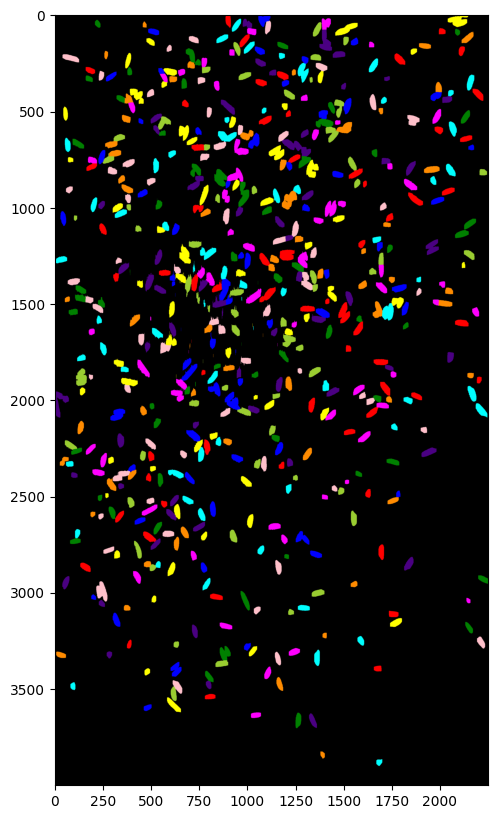

In [109]:
plt.figure(figsize=(30,10))
plt.imshow(color.label2rgb(labels, bg_label=0))
print("Number of Rice grains are : %d" % labels.max())

In [110]:
print("\n\nTotal rice grain count as per contour is: ",len(Rice_area))
print("\n")
TotalRiceAreaSum=0
for count in range(0,len(Rice_area)):
    print("Area of the rice grain",count+1, "is:",Rice_area[count],"mm")



Total rice grain count as per contour is:  604


Area of the rice grain 1 is: 3.929 mm
Area of the rice grain 2 is: 5.064 mm
Area of the rice grain 3 is: 6.689 mm
Area of the rice grain 4 is: 4.817 mm
Area of the rice grain 5 is: 2.995 mm
Area of the rice grain 6 is: 4.118 mm
Area of the rice grain 7 is: 2.291 mm
Area of the rice grain 8 is: 4.195 mm
Area of the rice grain 9 is: 4.11 mm
Area of the rice grain 10 is: 4.515 mm
Area of the rice grain 11 is: 3.155 mm
Area of the rice grain 12 is: 3.984 mm
Area of the rice grain 13 is: 6.134 mm
Area of the rice grain 14 is: 3.894 mm
Area of the rice grain 15 is: 2.736 mm
Area of the rice grain 16 is: 3.554 mm
Area of the rice grain 17 is: 4.525 mm
Area of the rice grain 18 is: 4.222 mm
Area of the rice grain 19 is: 3.817 mm
Area of the rice grain 20 is: 3.291 mm
Area of the rice grain 21 is: 4.414 mm
Area of the rice grain 22 is: 3.468 mm
Area of the rice grain 23 is: 3.509 mm
Area of the rice grain 24 is: 2.679 mm
Area of the rice grain 

In [111]:
BrokenRiceCount=0;
brokenRiceArea=0;
TotalRiceAreaSum=0
for rice in Rice_area:
    TotalRiceAreaSum+=rice
    if rice <4.064:
        brokenRiceArea+=rice
        BrokenRiceCount+=1
print("\nRice Analysis :")
print("Total rice count is",len(Rice_area))
print("Average area of rice is: ", round(TotalRiceAreaSum/len(Rice_area),3)," mm")
print("Broken Rice count is: ",BrokenRiceCount)
print("Percentage of rice grain broken is :",round((brokenRiceArea/len(Rice_area)+brokenRiceArea),3),"% percent")


Rice Analysis :
Total rice count is 604
Average area of rice is:  3.89  mm
Broken Rice count is:  337
Percentage of rice grain broken is : 1099.898 % percent


In [112]:
import cv2
import cv2 as cv
import urllib
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
from numpy import asarray
import matplotlib.image as mpimg
from scipy import ndimage
from skimage import filters, feature, measure, color
from skimage.segmentation import watershed

In [113]:
def show(image,x=30,y=7):
  plt.figure(figsize=(x,y))
  plt.imshow(image,cmap="gray")
img = cv2.imread(r"/image_4.jpg")

[[[136  43  40]
  [136  43  40]
  [136  43  40]
  ...
  [143  51  46]
  [145  53  48]
  [144  52  47]]

 [[137  44  41]
  [137  44  41]
  [137  44  41]
  ...
  [142  50  45]
  [145  53  48]
  [145  53  48]]

 [[137  44  41]
  [137  44  41]
  [136  43  40]
  ...
  [142  50  45]
  [144  52  47]
  [145  53  48]]

 ...

 [[105  27  21]
  [104  26  20]
  [104  28  22]
  ...
  [ 22   8  10]
  [ 21   8  10]
  [ 22   9  11]]

 [[107  29  23]
  [106  28  22]
  [105  27  21]
  ...
  [ 20   8   8]
  [ 21   9   9]
  [ 23  11  11]]

 [[105  27  21]
  [105  27  21]
  [105  27  21]
  ...
  [ 21   9   9]
  [ 21   9   9]
  [ 22  10  10]]]


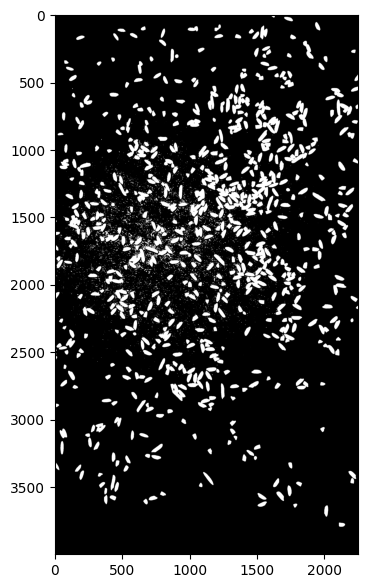

In [114]:
print(img)
grayscale_Image = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
m,brok_img = cv.threshold(grayscale_Image, 120, 255, cv.THRESH_BINARY)
show(brok_img)

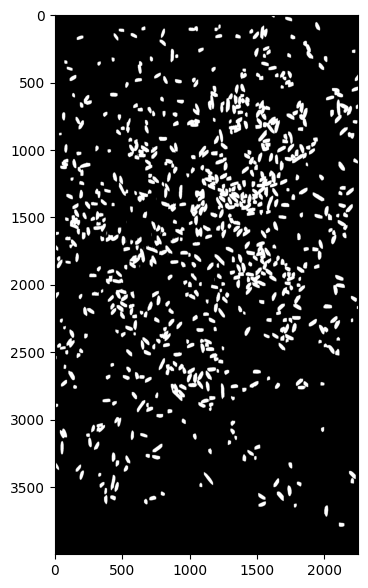

In [115]:
kernel = np.ones((3),np.uint8)
clr_img = cv.morphologyEx(brok_img,cv.MORPH_OPEN, kernel, iterations=8)
show(clr_img)

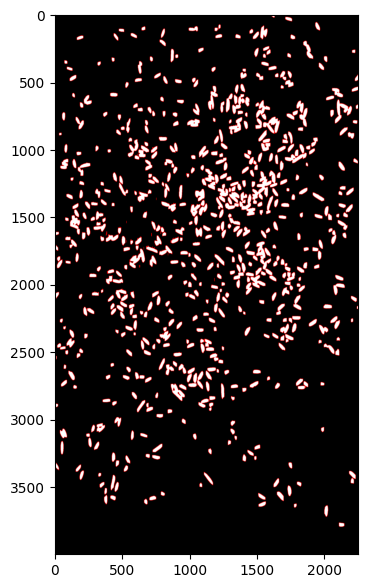

In [116]:
contours, hierarchy = cv.findContours(clr_img,
                                          cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
opt_contour = cv.cvtColor(clr_img, cv.COLOR_GRAY2BGR)
cv.drawContours(opt_contour, contours, -1, (255, 0, 0), 2)
show(opt_contour)

In [117]:
contours, hierarchy = cv.findContours(clr_img,
                                      cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
opt_contour = cv.cvtColor(clr_img, cv.COLOR_GRAY2BGR)
cv.drawContours(opt_contour, contours, -1, (0, 0, 255), 2)
print("Number of detected contours", len(contours))

Number of detected contours 629


In [118]:
dist_trans = ndimage.distance_transform_edt(clr_img)
local_max = feature.peak_local_max(dist_trans, min_distance=23)
local_max_mask = np.zeros(dist_trans.shape, dtype=bool)
local_max_mask[tuple(local_max.T)] = True
labels = watershed(-dist_trans, measure.label(local_max_mask), mask=clr_img)
Rice_area = []
unique_labels = np.unique(labels)
for label in unique_labels:
    if label == 0:
        continue
    object_mask = labels == label
    area = np.sum(object_mask)
    if area < 50:
        continue
    eq_diameter = np.sqrt(4 * area / np.pi)
    eq_diameter_mm = eq_diameter * 0.09
    Rice_area.append(round(eq_diameter_mm,3))

Number of Rice grains are : 695


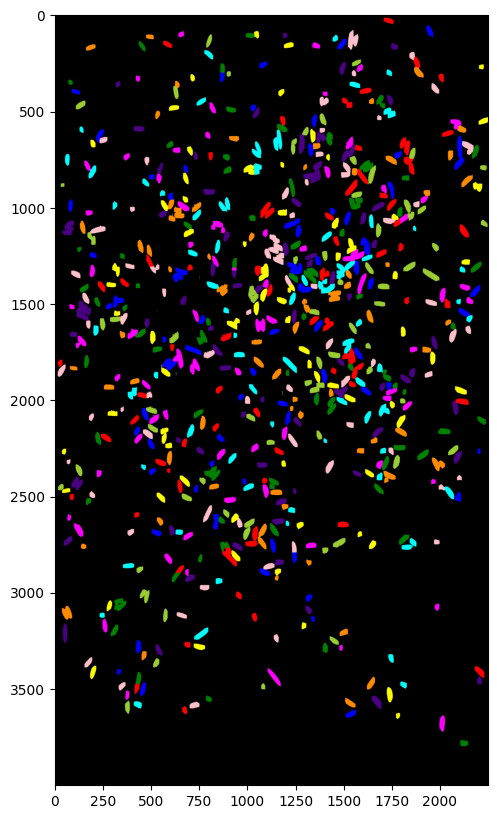

In [119]:
plt.figure(figsize=(30,10))
plt.imshow(color.label2rgb(labels, bg_label=0))
print("Number of Rice grains are : %d" % labels.max())

In [120]:
print("\n\nTotal rice grain count as per contour is: ",len(Rice_area))
print("\n")
TotalRiceAreaSum=0
for count in range(0,len(Rice_area)):
    print("Area of the rice grain",count+1, "is:",Rice_area[count],"mm")



Total rice grain count as per contour is:  690


Area of the rice grain 1 is: 3.55 mm
Area of the rice grain 2 is: 3.86 mm
Area of the rice grain 3 is: 2.84 mm
Area of the rice grain 4 is: 2.721 mm
Area of the rice grain 5 is: 3.286 mm
Area of the rice grain 6 is: 2.425 mm
Area of the rice grain 7 is: 2.982 mm
Area of the rice grain 8 is: 2.798 mm
Area of the rice grain 9 is: 6.013 mm
Area of the rice grain 10 is: 3.615 mm
Area of the rice grain 11 is: 3.45 mm
Area of the rice grain 12 is: 3.954 mm
Area of the rice grain 13 is: 3.518 mm
Area of the rice grain 14 is: 3.21 mm
Area of the rice grain 15 is: 3.294 mm
Area of the rice grain 16 is: 3.165 mm
Area of the rice grain 17 is: 3.453 mm
Area of the rice grain 18 is: 3.652 mm
Area of the rice grain 19 is: 3.127 mm
Area of the rice grain 20 is: 3.305 mm
Area of the rice grain 21 is: 3.783 mm
Area of the rice grain 22 is: 3.272 mm
Area of the rice grain 23 is: 2.422 mm
Area of the rice grain 24 is: 3.035 mm
Area of the rice grain 25 i

In [121]:
BrokenRiceCount=0;
brokenRiceArea=0;
TotalRiceAreaSum=0
for rice in Rice_area:
    TotalRiceAreaSum+=rice
    if rice <4.064:
        brokenRiceArea+=rice
        BrokenRiceCount+=1
print("\nRice Analysis :")
print("Total rice count is",len(Rice_area))
print("Average area of rice is: ", round(TotalRiceAreaSum/len(Rice_area),3)," mm")
print("Broken Rice count is: ",BrokenRiceCount)
print("Percentage of rice grain broken is :",round((brokenRiceArea/len(Rice_area)+brokenRiceArea),3),"% percent")


Rice Analysis :
Total rice count is 690
Average area of rice is:  3.595  mm
Broken Rice count is:  533
Percentage of rice grain broken is : 1747.899 % percent


In [122]:
import cv2
import cv2 as cv
import urllib
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
from numpy import asarray
import matplotlib.image as mpimg
from scipy import ndimage
from skimage import filters, feature, measure, color
from skimage.segmentation import watershed

In [123]:
def show(image,x=30,y=7):
  plt.figure(figsize=(x,y))
  plt.imshow(image,cmap="gray")
img = cv2.imread(r"/image_5.jpg")

[[[132  39  36]
  [132  39  36]
  [133  40  37]
  ...
  [131  44  40]
  [131  44  40]
  [130  43  39]]

 [[132  39  36]
  [132  39  36]
  [132  39  36]
  ...
  [130  43  39]
  [130  43  39]
  [131  44  40]]

 [[132  39  36]
  [132  39  36]
  [132  39  36]
  ...
  [129  42  38]
  [130  43  39]
  [131  44  40]]

 ...

 [[ 94  25  22]
  [ 95  26  23]
  [ 97  26  23]
  ...
  [105  21  15]
  [105  21  15]
  [105  21  15]]

 [[101  30  27]
  [102  31  28]
  [ 99  28  25]
  ...
  [104  20  14]
  [104  20  14]
  [104  20  14]]

 [[101  30  27]
  [100  29  26]
  [101  30  27]
  ...
  [104  20  14]
  [103  19  13]
  [104  20  14]]]


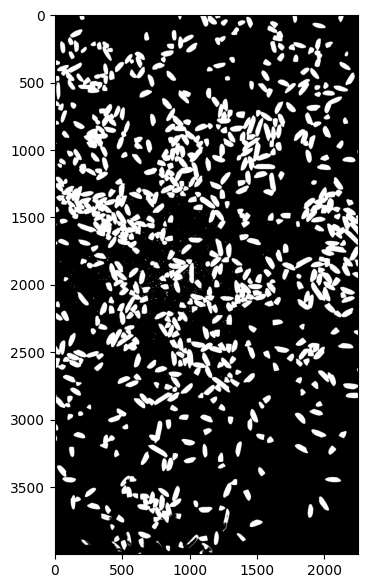

In [124]:
print(img)
grayscale_Image = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
m,brok_img = cv.threshold(grayscale_Image, 120, 255, cv.THRESH_BINARY)
show(brok_img)

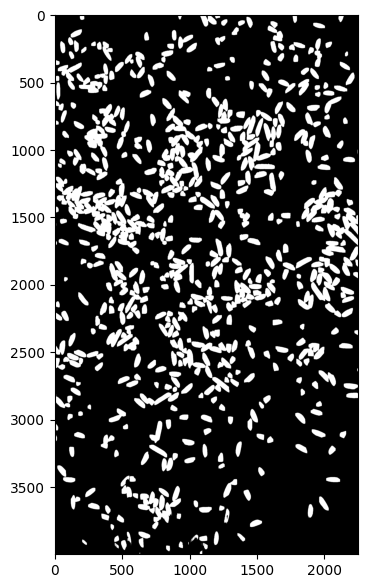

In [125]:
kernel = np.ones((3),np.uint8)
clr_img = cv.morphologyEx(brok_img,cv.MORPH_OPEN, kernel, iterations=8)
show(clr_img)

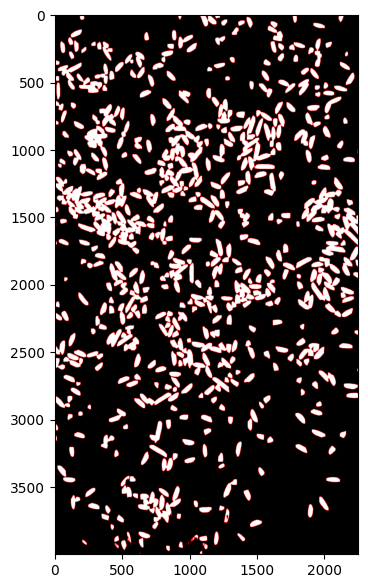

In [126]:
contours, hierarchy = cv.findContours(clear_image,
                                          cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

output_contour = cv.cvtColor(clear_image, cv.COLOR_GRAY2BGR)
cv.drawContours(output_contour, contours, -1, (255, 0, 0), 2)
show(output_contour)

In [127]:
contours, hierarchy = cv.findContours(clr_img,
                                      cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
opt_contour = cv.cvtColor(clr_img, cv.COLOR_GRAY2BGR)
cv.drawContours(opt_contour, contours, -1, (0, 0, 255), 2)
print("Number of detected contours", len(contours))

Number of detected contours 504


In [128]:
dist_trans = ndimage.distance_transform_edt(clr_img)
local_max = feature.peak_local_max(dist_trans, min_distance=23)
local_max_mask = np.zeros(dist_trans.shape, dtype=bool)
local_max_mask[tuple(local_max.T)] = True
labels = watershed(-dist_trans, measure.label(local_max_mask), mask=clr_img)
Rice_area = []
unique_labels = np.unique(labels)
for label in unique_labels:
    if label == 0:
        continue
    object_mask = labels == label
    area = np.sum(object_mask)
    if area < 50:
        continue
    eq_diameter = np.sqrt(4 * area / np.pi)
    eq_diameter_mm = eq_diameter * 0.09
    Rice_area.append(round(eq_diameter_mm,3))

Number of Rice grains are : 704


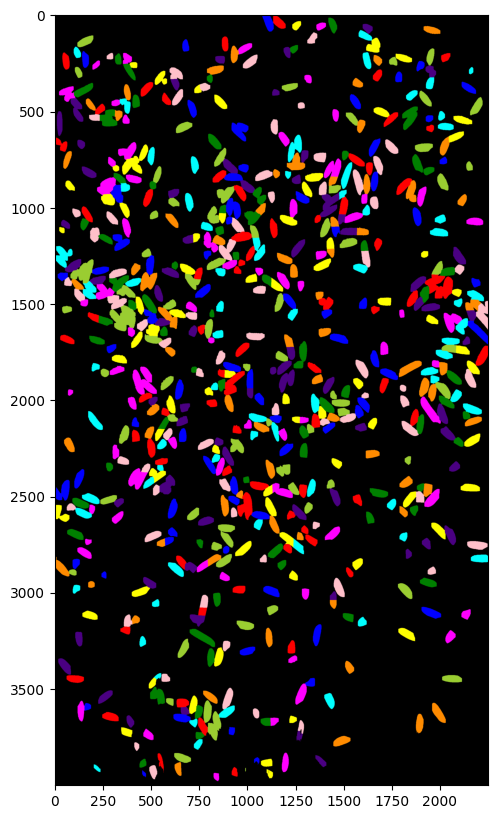

In [129]:
plt.figure(figsize=(30,10))
plt.imshow(color.label2rgb(labels, bg_label=0))
print("Number of Rice grains are : %d" % labels.max())

In [130]:
print("\n\nTotal rice grain count as per contour is: ",len(Rice_area))
print("\n")
TotalRiceAreaSum=0
for count in range(0,len(Rice_area)):
    print("Area of the rice grain",count+1, "is:",Rice_area[count],"mm")



Total rice grain count as per contour is:  704


Area of the rice grain 1 is: 5.548 mm
Area of the rice grain 2 is: 5.873 mm
Area of the rice grain 3 is: 4.071 mm
Area of the rice grain 4 is: 4.019 mm
Area of the rice grain 5 is: 5.117 mm
Area of the rice grain 6 is: 4.374 mm
Area of the rice grain 7 is: 5.192 mm
Area of the rice grain 8 is: 4.945 mm
Area of the rice grain 9 is: 4.534 mm
Area of the rice grain 10 is: 5.642 mm
Area of the rice grain 11 is: 4.827 mm
Area of the rice grain 12 is: 4.343 mm
Area of the rice grain 13 is: 6.404 mm
Area of the rice grain 14 is: 5.04 mm
Area of the rice grain 15 is: 3.715 mm
Area of the rice grain 16 is: 4.105 mm
Area of the rice grain 17 is: 5.364 mm
Area of the rice grain 18 is: 4.134 mm
Area of the rice grain 19 is: 3.115 mm
Area of the rice grain 20 is: 5.17 mm
Area of the rice grain 21 is: 4.156 mm
Area of the rice grain 22 is: 5.018 mm
Area of the rice grain 23 is: 5.228 mm
Area of the rice grain 24 is: 4.62 mm
Area of the rice grain 25

In [131]:
BrokenRiceCount=0;
brokenRiceArea=0;
TotalRiceAreaSum=0
for rice in Rice_area:
    TotalRiceAreaSum+=rice
    if rice <4.064:
        brokenRiceArea+=rice
        BrokenRiceCount+=1
print("\nRice Analysis :")
print("Total rice count is",len(Rice_area))
print("Average area of rice is: ", round(TotalRiceAreaSum/len(Rice_area),3)," mm")
print("Broken Rice count is: ",BrokenRiceCount)
print("Percentage of rice grain broken is :",round((brokenRiceArea/len(Rice_area)+brokenRiceArea),3),"% percent")


Rice Analysis :
Total rice count is 704
Average area of rice is:  4.967  mm
Broken Rice count is:  154
Percentage of rice grain broken is : 551.087 % percent
